# 

# AI Competition for the Prediction of Water Level in Hangang River by the Flood Safety Management of Paldang Dam
---

# tensorflow GPU 접근 테스트

In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
%%time
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

batch_size = 128

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#   tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=12,
    validation_data=ds_test,
)

Metal device set to: Apple M2
Cause: Unable to locate the source code of <function normalize_img at 0x28f906d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-13 17:05:11.941148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-13 17:05:11.941244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Cause: Unable to locate the source code of <function normalize_img at 0x28f906d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autogr

Cause: Unable to locate the source code of <function normalize_img at 0x28f906d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-13 17:05:11.998852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-13 17:05:11.998870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-13 17:05:11.999665: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-08-13 17:05:12.000416: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-13 17:05:12.082500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.091965: I tensorflow/core/grappler/optimizers/custom_graph

Train on 469 steps, validate on 79 steps
Epoch 1/12


2022-08-13 17:05:12.231768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.244928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.261302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.275968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.302739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-13 17:05:12.314592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - batch: 233.5000 - size: 1.0000 - loss: 0.1689 - accuracy: 0.9506

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-08-13 17:05:19.527364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.1685 - accuracy: 0.9506 - val_loss: 0.0562 - val_accuracy: 0.9810
Epoch 2/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 3/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 4/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 5/12
469/469 [==============================] - 7s 13ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 6/12
469/469 [==============================] - 7s 13ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0097 - accuracy: 0.99

> Good


# data

## Water Data

- ymdhm : 년월일시분
- swl : 팔당댐 현재수위 (단위: El.m)
- inf : 팔당댐 유입량 (단위: m^3/s)
- sfw : 팔당댐 저수량 (단위: 만m^3)
- ecpc : 팔당댐 공용량 (단위: 백만m^3)
- tototf : 총 방류량 (단위: m^3/s)
- tide_level : 강화대교 조위 (단위: cm)
- wl_1018662 : 청담대교 수위 (단위: cm)
- fw_1018662 : 청담대교 유량 (단위: m^3/s)
- wl_1018680 : 잠수교 수위 (단위: cm)
- fw_1018680 : 잠수교 유량 (단위: m^3/s)
- wl_1018683 : 한강대교 수위 (단위: cm)
- fw_1018683 : 한강대교 유량 (단위: m^3/s)
- wl_1019630 : 행주대교 수위 (단위: cm)
- fw_1019630 : 행주대교 유량 (단위: m^3/s)

## RainFall Data

- YMDHM : 년월일시분
- rf_10184100 : 대곡교 강수량
- rf_10184110 : 진관교 강수량
- rf_10184140 : 송정동 강수량
---

# 기타 용어 정리

- 최고 수위 : 일정한 기간을 통하여 나타난 최고의 수위
- 최저 수위 : 일정한 기간을 통하여 나타난 최저의 수위
- 평수위 : 1년을 통하여 185일은 이보다 높은 수위
- 저수위 : 1년을 통하여 275일은 이보다 높은 수위
- 갈수위 : 1년을 통하여 355일은 이보다 높은 수위
- 일평균 수위 : 1일을 통하여 1시부터 24시까지 매시 수위의 합을 24로 나눈 수위
- 연평균 수위 : 1년을 통하여 일평균 수위의 합을 당해 연도의 일수로 나눈 수위
- 감조하천 : 조석의 영향으로 하천의 하류부에서 수위가 변하는 하천


# 주요 링크 모음

한강 홍수 통제소
- http://www.hrfco.go.kr/sumun/rainfallList.do#

한국 수자원 공사
- https://www.kwater.or.kr/main.do?s_mid=1

정보공개
- https://www.open.go.kr/com/main/mainView.do?mainBgGubun=search

In [1]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna
import os

# MICE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# flag setting
data_reducing = False ## memory reducing technique
feature_reducing = False ## feature extraction (curse of dimensionality)

In [3]:
df = pd.read_csv('competition_data/water_data/data_2012.csv', parse_dates=['ymdhm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ymdhm       26496 non-null  datetime64[ns]
 1   swl         26495 non-null  float64       
 2   inf         26495 non-null  float64       
 3   sfw         26495 non-null  float64       
 4   ecpc        26495 non-null  float64       
 5   tototf      26495 non-null  float64       
 6   tide_level  25720 non-null  float64       
 7   wl_1018662  26496 non-null  float64       
 8   fw_1018662  26496 non-null  float64       
 9   wl_1018680  26496 non-null  float64       
 10  fw_1018680  26496 non-null  float64       
 11  wl_1018683  26496 non-null  float64       
 12  fw_1018683  26496 non-null  float64       
 13  wl_1019630  26496 non-null  float64       
 14  fw_1019630  26496 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 3.0 MB


<AxesSubplot:xlabel='ymdhm', ylabel='inf'>

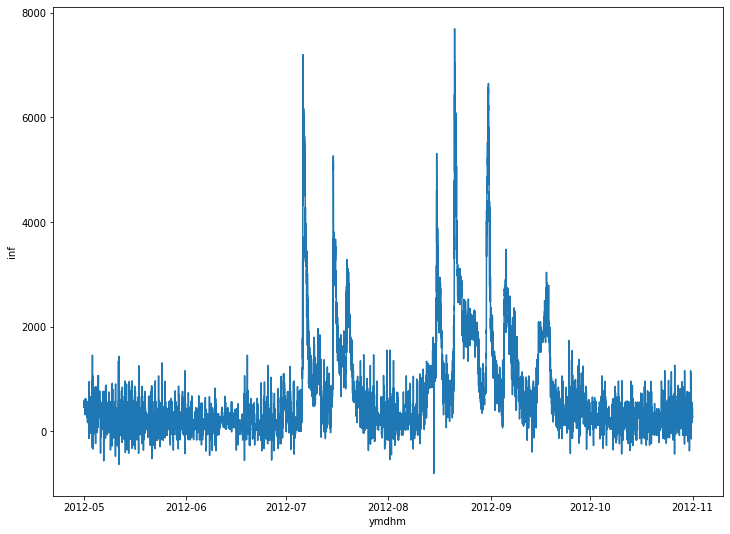

In [4]:
plt.figure(figsize = (12,9))
sns.lineplot(data = df[['ymdhm','inf','tototf']], x = df['ymdhm'], y = df['inf'])

In [5]:
for water_data in os.listdir('competition_data/water_data/'):
    display(pd.read_csv(f'competition_data/water_data/{water_data}'))

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2021-05-01 00:00,24.93,0.0,208.88,35.12,138.0,311.0,361.7,905.32,346.2,NaN,340.0,983.18,301.3,895.58
1,2021-05-01 00:10,24.93,0.0,208.88,35.12,138.0,297.0,356.7,856.07,338.2,NaN,335.0,1285.80,308.3,1006.88
2,2021-05-01 00:20,24.92,0.0,208.52,35.48,138.0,283.0,347.7,770.98,331.2,NaN,331.0,1381.43,313.3,1090.45
3,2021-05-01 00:30,24.92,0.0,208.52,35.48,151.0,271.0,337.7,681.80,327.2,NaN,329.0,1359.95,315.3,1124.83
4,2021-05-01 00:40,24.92,0.0,208.52,35.48,151.0,259.0,328.7,606.35,323.2,NaN,327.0,1267.65,316.3,1142.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2021-10-31 23:10,25.04,56.0,212.86,31.14,157.0,NaN,269.7,NaN,258.2,NaN,265.0,207.27,253.3,310.31
26492,2021-10-31 23:20,25.04,56.0,212.86,31.14,157.0,NaN,270.7,NaN,258.2,NaN,265.0,211.33,254.3,319.36
26493,2021-10-31 23:30,25.04,56.0,212.86,31.14,157.0,NaN,270.7,NaN,258.2,NaN,265.0,219.46,254.3,319.36
26494,2021-10-31 23:40,25.04,56.0,212.86,31.14,157.0,NaN,271.7,NaN,258.2,NaN,265.0,227.59,254.3,319.36


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2020-05-01 00:00,25.02,34.0,212.14,31.86,135.0,398.0,278.7,269.40,279.2,NaN,264.0,231.30,252.3,301.39
1,2020-05-01 00:10,25.01,0.0,211.77,32.23,135.0,386.0,278.7,269.40,279.2,NaN,264.0,219.12,252.3,301.39
2,2020-05-01 00:20,25.01,0.0,211.77,32.23,135.0,374.0,278.7,269.40,279.2,NaN,264.0,215.07,252.3,301.39
3,2020-05-01 00:30,25.01,0.0,211.77,32.23,135.0,363.0,278.7,269.40,279.2,NaN,264.0,219.12,251.3,292.61
4,2020-05-01 00:40,25.01,28.0,211.77,32.23,129.0,352.0,278.7,269.40,279.2,NaN,264.0,227.24,250.3,283.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2020-10-31 23:10,25.12,136.0,215.79,28.21,136.0,234.0,324.7,574.28,340.2,NaN,324.0,295.70,316.3,1142.22
26492,2020-10-31 23:20,25.11,34.0,215.42,28.58,136.0,223.0,325.7,582.21,339.2,NaN,322.0,189.27,314.3,1107.57
26493,2020-10-31 23:30,25.09,0.0,214.69,29.31,137.0,211.0,326.7,590.20,338.2,NaN,321.0,215.39,310.3,1039.90
26494,2020-10-31 23:40,25.09,0.0,214.69,29.31,137.0,200.0,327.7,598.25,338.2,NaN,320.0,228.26,307.3,990.57


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2022-05-01 00:00,25.20,739.36,218.73,25.27,124.36,81.0,290.7,337.64,284.2,NaN,279.0,0.00,269.3,471.08
1,2022-05-01 00:10,25.20,124.48,218.73,25.27,124.48,72.0,291.7,343.69,284.2,NaN,279.0,145.14,266.3,438.33
2,2022-05-01 00:20,25.20,124.20,218.73,25.27,124.20,64.0,290.7,337.64,284.2,NaN,279.0,232.22,264.3,417.17
3,2022-05-01 00:30,25.20,124.35,218.73,25.27,124.35,58.0,289.7,331.65,284.2,NaN,279.0,302.71,263.3,406.79
4,2022-05-01 00:40,25.19,0.00,218.36,25.64,124.42,58.0,287.7,319.84,284.2,NaN,279.0,340.03,264.3,417.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2018-05-01 00:00,25.02,314.0,212.14,31.86,314.0,168.0,340.7,707.97,324.2,NaN,327.0,458.22,314.3,1107.57
1,2018-05-01 00:10,25.01,175.0,211.77,32.23,276.0,157.0,340.7,707.97,323.2,NaN,326.0,453.16,312.3,1073.46
2,2018-05-01 00:20,25.01,262.0,211.77,32.23,262.0,147.0,340.7,707.97,322.2,NaN,325.0,483.62,310.3,1039.90
3,2018-05-01 00:30,25.01,262.0,211.77,32.23,262.0,137.0,338.7,690.47,321.2,NaN,324.0,527.28,307.3,990.57
4,2018-05-01 00:40,25.01,262.0,211.77,32.23,262.0,127.0,338.7,690.47,320.2,NaN,323.0,561.97,305.3,958.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2018-10-31 23:10,25.11,50.0,215.42,28.58,152.0,559.0,286.7,314.01,275.2,NaN,275.0,157.37,263.3,406.79
26492,2018-10-31 23:20,25.11,152.0,215.42,28.58,152.0,551.0,286.7,314.01,274.2,NaN,274.0,107.52,263.3,406.79
26493,2018-10-31 23:30,25.12,152.0,215.42,28.58,152.0,542.0,286.7,314.01,274.2,NaN,274.0,140.60,263.3,406.79
26494,2018-10-31 23:40,25.12,254.0,215.79,28.21,152.0,531.0,286.7,314.01,274.2,NaN,274.0,165.41,262.3,396.55


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2019-05-01 00:00,25.00,0.0,211.41,32.59,329.0,186.0,293.7,355.94,278.2,NaN,278.0,374.30,266.3,438.33
1,2019-05-01 00:10,25.00,0.0,211.41,32.59,198.0,199.0,293.7,355.94,278.2,NaN,278.0,374.30,266.3,438.33
2,2019-05-01 00:20,25.00,0.0,211.41,32.59,137.0,215.0,293.7,355.94,278.2,NaN,278.0,374.30,266.3,438.33
3,2019-05-01 00:30,25.00,0.0,211.41,32.59,136.0,233.0,293.7,355.94,278.2,NaN,278.0,374.30,266.3,438.33
4,2019-05-01 00:40,25.00,35.0,211.41,32.59,136.0,249.0,293.7,355.94,278.2,NaN,278.0,353.51,266.3,438.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2019-10-31 23:10,25.12,127.0,215.79,28.21,127.0,435.0,427.7,1689.09,405.2,NaN,400.0,-898.87,358.3,1996.24
26492,2019-10-31 23:20,25.12,133.0,215.79,28.21,133.0,417.0,431.7,1744.63,409.2,NaN,403.0,-573.68,356.3,1950.09
26493,2019-10-31 23:30,25.12,133.0,215.79,28.21,140.0,399.0,432.7,1758.66,411.2,NaN,405.0,14.75,354.3,1904.48
26494,2019-10-31 23:40,25.12,140.0,215.79,28.21,140.0,382.0,430.7,1730.66,411.2,NaN,405.0,403.06,350.3,1814.92


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2014-05-01 00:00,25.280,132.0,236.11,7.89,132.0,196.0,325.7,582.21,316.2,0.0,315.0,350.33,311.3,1056.61
1,2014-05-01 00:10,25.289,126.3,236.45,7.56,126.3,185.0,326.7,590.20,315.2,0.0,312.0,249.84,308.3,1006.88
2,2014-05-01 00:20,25.289,126.3,236.45,7.56,126.3,175.0,326.7,590.20,315.2,0.0,311.0,206.48,305.3,958.36
3,2014-05-01 00:30,25.289,132.2,236.45,7.56,132.2,165.0,327.7,598.25,315.2,0.0,311.0,249.50,302.3,911.07
4,2014-05-01 00:40,25.289,126.2,236.45,7.56,126.2,155.0,327.7,598.25,314.2,0.0,310.0,305.01,298.3,849.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2014-10-31 23:10,25.126,145.4,230.56,13.44,145.4,556.0,287.7,319.84,275.2,0.0,273.0,257.19,269.3,471.08
26492,2014-10-31 23:20,25.127,145.3,230.58,13.42,145.3,557.0,287.7,319.84,275.2,0.0,272.0,256.83,269.3,471.08
26493,2014-10-31 23:30,25.131,145.2,230.75,13.25,145.2,554.0,287.7,319.84,275.2,0.0,272.0,252.76,268.3,460.03
26494,2014-10-31 23:40,25.140,245.1,231.05,12.95,145.1,550.0,287.7,319.84,275.2,0.0,272.0,252.76,268.3,460.03


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2015-05-01 00:00,25.190,47.00,232.86,11.14,147.00,124.0,284.7,302.53,268.2,NaN,268.0,227.02,265.3,427.69
1,2015-05-01 00:10,25.199,151.20,233.19,10.81,151.20,132.0,284.7,302.53,268.2,NaN,268.0,267.56,265.3,427.69
2,2015-05-01 00:20,25.199,151.10,233.19,10.81,151.10,140.0,285.7,308.24,268.2,NaN,268.0,320.26,265.3,427.69
3,2015-05-01 00:30,25.190,51.20,232.86,11.14,151.20,150.0,286.7,314.01,268.2,NaN,268.0,271.61,265.3,427.69
4,2015-05-01 00:40,25.190,51.20,232.86,11.14,151.20,164.0,286.7,314.01,268.2,NaN,268.0,312.15,264.3,417.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2015-10-31 23:10,25.349,-20.88,224.27,19.73,83.32,475.0,358.7,875.60,340.2,NaN,336.0,-1845.96,339.3,1579.97
26492,2015-10-31 23:20,25.347,-20.87,224.23,19.78,83.33,457.0,366.7,955.99,349.2,NaN,346.0,-1338.61,339.3,1579.97
26493,2015-10-31 23:30,25.340,-125.03,223.93,20.07,83.37,438.0,374.7,1040.02,355.2,NaN,352.0,-967.58,337.3,1539.03
26494,2015-10-31 23:40,25.320,-332.12,223.18,20.82,83.48,420.0,382.7,1127.69,360.2,NaN,357.0,-791.01,333.3,1458.80


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2017-05-01 00:00,25.280,11.00,221.70,22.30,114.00,342.0,330.7,622.73,309.2,NaN,304.0,-944.41,295.3,805.46
1,2017-05-01 00:10,25.259,16.60,220.93,23.07,119.90,326.0,333.7,647.71,314.2,NaN,312.0,-523.16,291.3,748.09
2,2017-05-01 00:20,25.256,16.61,220.83,23.17,119.91,310.0,336.7,673.20,317.2,NaN,315.0,-131.32,287.3,692.88
3,2017-05-01 00:30,25.250,0.00,220.57,23.43,119.95,295.0,337.7,681.80,317.2,NaN,316.0,157.80,283.3,639.83
4,2017-05-01 00:40,25.245,0.00,220.40,23.61,119.97,280.0,336.7,673.20,317.2,NaN,316.0,403.27,281.3,614.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2017-10-31 23:10,25.200,156.00,218.73,25.27,156.00,185.0,275.7,253.57,261.2,NaN,263.0,179.12,256.3,337.86
26492,2017-10-31 23:20,25.200,156.00,218.73,25.27,156.00,193.0,275.7,253.57,262.2,NaN,263.0,170.98,256.3,337.86
26493,2017-10-31 23:30,25.200,156.00,218.73,25.27,156.00,202.0,275.7,253.57,262.2,NaN,263.0,166.91,256.3,337.86
26494,2017-10-31 23:40,25.200,156.00,218.73,25.27,156.00,213.0,276.7,258.79,261.2,NaN,263.0,138.41,256.3,337.86


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2016-05-01 00:00,25.090,451.00,215.42,28.58,654.00,474.0,316.7,512.81,304.2,NaN,300.0,677.62,291.3,748.09
1,2016-05-01 00:10,25.095,230.64,214.88,29.12,128.94,467.0,316.7,512.81,304.2,NaN,300.0,681.91,292.3,762.23
2,2016-05-01 00:20,25.089,128.98,214.64,29.36,128.98,459.0,315.7,505.38,303.2,NaN,300.0,669.04,292.3,762.23
3,2016-05-01 00:30,25.080,27.64,214.33,29.68,129.04,451.0,312.7,483.42,303.2,NaN,300.0,514.65,292.3,762.23
4,2016-05-01 00:40,25.083,27.32,214.42,29.58,129.02,441.0,312.7,483.42,302.2,NaN,300.0,493.20,292.3,762.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2016-10-31 23:10,25.300,191.43,222.44,21.56,87.53,242.0,338.7,690.47,325.2,NaN,326.0,937.43,317.3,1159.75
26492,2016-10-31 23:20,25.289,87.58,222.04,21.96,87.58,229.0,331.7,631.00,322.2,NaN,325.0,776.45,316.3,1142.22
26493,2016-10-31 23:30,25.289,87.58,222.04,21.96,87.58,216.0,327.7,598.25,320.2,NaN,323.0,584.09,316.3,1142.22
26494,2016-10-31 23:40,25.289,87.58,222.04,21.96,87.58,204.0,325.7,582.21,318.2,NaN,321.0,441.31,315.3,1124.83


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2012-10-31 23:10,25.250,270.2,235.01,8.99,270.2,300.0,372.7,1018.67,364.2,0.0,365.0,1395.30,351.3,1837.11
26492,2012-10-31 23:20,25.250,264.1,235.01,8.99,264.1,286.0,365.7,945.75,359.2,0.0,362.0,1154.21,350.3,1814.92
26493,2012-10-31 23:30,25.250,257.9,235.01,8.99,257.9,273.0,362.7,915.35,356.2,0.0,359.0,968.58,349.3,1792.88
26494,2012-10-31 23:40,25.250,264.1,235.01,8.99,264.1,261.0,355.7,846.39,352.2,0.0,356.0,776.99,346.3,1727.56


,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2013-05-01 00:00,25.290,151.0,236.48,7.53,151.0,384.0,332.7,639.32,317.2,0.0,314.0,-993.41,305.3,958.36
1,2013-05-01 00:10,25.289,173.8,236.45,7.56,173.8,369.0,338.7,690.47,327.2,0.0,316.0,-775.22,302.3,911.07
2,2013-05-01 00:20,25.289,173.8,236.45,7.56,173.8,353.0,343.7,734.64,334.2,0.0,324.0,-380.85,297.3,834.96
3,2013-05-01 00:30,25.288,173.8,236.41,7.59,173.8,338.0,347.7,770.98,337.2,0.0,326.0,-52.67,292.3,762.23
4,2013-05-01 00:40,25.278,73.9,236.04,7.96,173.9,322.0,349.7,789.50,338.2,0.0,327.0,237.34,288.3,706.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2013-10-31 23:10,25.231,171.9,234.40,9.60,171.9,109.0,280.7,280.22,274.2,0.0,268.0,372.96,259.3,366.60
26492,2013-10-31 23:20,25.224,71.0,234.10,9.90,171.0,124.0,280.7,280.22,274.2,0.0,268.0,348.63,259.3,366.60
26493,2013-10-31 23:30,25.219,70.6,233.91,10.09,170.6,141.0,280.7,280.22,273.2,0.0,267.0,315.76,260.3,376.45
26494,2013-10-31 23:40,25.219,70.2,233.91,10.09,170.2,157.0,280.7,280.22,273.2,0.0,267.0,263.13,260.3,376.45


In [6]:
df_water = pd.DataFrame()
for files in os.listdir('competition_data/water_data/'):
    df_con = pd.read_csv(f'competition_data/water_data/{files}', parse_dates=['ymdhm'])
    df_water = pd.concat([df_water,df_con], ignore_index=True)
# for files in os.listdir('competition_data/rf_data/'):
#     pass
df_water = df_water.sort_values(by = df.columns[0]).reset_index(drop = True)
df_water

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
276332,2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
276333,2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90
276334,2022-07-18 23:40:00,25.040,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46


In [7]:
df_rf = pd.DataFrame()
for files in os.listdir('competition_data/rf_data/'):
    df_con = pd.read_csv(f'competition_data/rf_data/{files}', parse_dates=['ymdhm'])
    df_rf = pd.concat([df_rf,df_con], ignore_index=True)
# for files in os.listdir('competition_data/rf_data/'):
#     pass
df_rf = df_rf.sort_values(by = df.columns[0]).reset_index(drop = True)
df_rf.drop(columns='ymdhm')

,rf_10184100,rf_10184110,rf_10184140
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
276331,0.0,0.0,0.0
276332,0.0,0.0,0.0
276333,0.0,0.0,0.0
276334,0.0,0.0,0.0


In [8]:
df = pd.concat([df_water,df_rf.drop(columns='ymdhm')], axis = 1)
df

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0,0.0,0.0
276332,2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0,0.0,0.0
276333,2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0
276334,2022-07-18 23:40:00,25.040,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   swl          275593 non-null  float64       
 2   inf          275593 non-null  float64       
 3   sfw          275593 non-null  float64       
 4   ecpc         275593 non-null  float64       
 5   tototf       275593 non-null  float64       
 6   tide_level   271409 non-null  float64       
 7   wl_1018662   276277 non-null  float64       
 8   fw_1018662   259956 non-null  float64       
 9   wl_1018680   276277 non-null  float64       
 10  fw_1018680   79487 non-null   float64       
 11  wl_1018683   276277 non-null  float64       
 12  fw_1018683   275057 non-null  float64       
 13  wl_1019630   276277 non-null  float64       
 14  fw_1019630   276277 non-null  float64       
 15  rf_10184100  276336 non-null  floa

## train data
> 2012-05-01 00:00:00 ~ 2022-05-31 23:50:00

In [10]:
train = df[df.ymdhm < '2022-06-01 00:00:00']
train

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269419,2022-05-31 23:10:00,25.180,140.94,217.99,26.01,140.94,220.0,281.7,285.72,281.2,NaN,278.0,575.57,271.3,493.58,0.0,0.0,0.0
269420,2022-05-31 23:20:00,25.180,141.07,217.99,26.01,141.07,208.0,279.7,274.78,279.2,NaN,278.0,501.04,272.3,505.03,0.0,0.0,0.0
269421,2022-05-31 23:30:00,25.180,141.01,217.99,26.01,141.01,196.0,278.7,269.40,277.2,NaN,277.0,425.89,272.3,505.03,0.0,0.0,0.0
269422,2022-05-31 23:40:00,25.190,755.75,218.36,25.64,140.75,184.0,277.7,264.07,276.2,NaN,276.0,198.19,271.3,493.58,0.0,0.0,0.0


## test data 
> 2022-06-01 00:00:00 ~ 2022-07-18 23:50:00

In [11]:
test = df[df.ymdhm >= '2022-06-01 00:00:00']
test

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
269424,2022-06-01 00:00:00,25.19,140.60,218.36,25.64,140.60,162.0,0.0,269.40,0.0,NaN,0.0,8.23,0.0,471.08,0.0,0.0,0.0
269425,2022-06-01 00:10:00,25.19,140.78,218.36,25.64,140.78,151.0,0.0,280.22,0.0,NaN,0.0,28.82,0.0,449.12,0.0,0.0,0.0
269426,2022-06-01 00:20:00,25.20,755.90,218.73,25.27,140.90,141.0,0.0,296.87,0.0,NaN,0.0,12.35,0.0,417.17,0.0,0.0,0.0
269427,2022-06-01 00:30:00,25.19,0.00,218.36,25.64,140.94,130.0,0.0,302.53,0.0,NaN,0.0,53.52,0.0,386.43,0.0,0.0,0.0
269428,2022-06-01 00:40:00,25.19,140.63,218.36,25.64,140.63,120.0,0.0,296.87,0.0,NaN,0.0,107.04,0.0,366.60,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0,0.0,0.0
276332,2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0,0.0,0.0
276333,2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0
276334,2022-07-18 23:40:00,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0,0.0,0.0


## 2. EDA
- 데이터에서 찾아야 하는 기초적인 내용들을 확인합니다.


- class imbalance, target distribution, outlier, correlation을 확인합니다.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269424 entries, 0 to 269423
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        269424 non-null  datetime64[ns]
 1   swl          268717 non-null  float64       
 2   inf          268717 non-null  float64       
 3   sfw          268717 non-null  float64       
 4   ecpc         268717 non-null  float64       
 5   tototf       268717 non-null  float64       
 6   tide_level   264501 non-null  float64       
 7   wl_1018662   269365 non-null  float64       
 8   fw_1018662   254260 non-null  float64       
 9   wl_1018680   269365 non-null  float64       
 10  fw_1018680   79487 non-null   float64       
 11  wl_1018683   269365 non-null  float64       
 12  fw_1018683   268145 non-null  float64       
 13  wl_1019630   269365 non-null  float64       
 14  fw_1019630   269365 non-null  float64       
 15  rf_10184100  269424 non-null  floa

> train 기간은 target value인 wl_101xxxx에도 결측값이 있음

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6912 entries, 269424 to 276335
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ymdhm        6912 non-null   datetime64[ns]
 1   swl          6876 non-null   float64       
 2   inf          6876 non-null   float64       
 3   sfw          6876 non-null   float64       
 4   ecpc         6876 non-null   float64       
 5   tototf       6876 non-null   float64       
 6   tide_level   6908 non-null   float64       
 7   wl_1018662   6912 non-null   float64       
 8   fw_1018662   5696 non-null   float64       
 9   wl_1018680   6912 non-null   float64       
 10  fw_1018680   0 non-null      float64       
 11  wl_1018683   6912 non-null   float64       
 12  fw_1018683   6912 non-null   float64       
 13  wl_1019630   6912 non-null   float64       
 14  fw_1019630   6912 non-null   float64       
 15  rf_10184100  6912 non-null   float64       
 16 

> test기간에는 target value인 wl_101xxxx에 결측치 없음

### Train data visualize

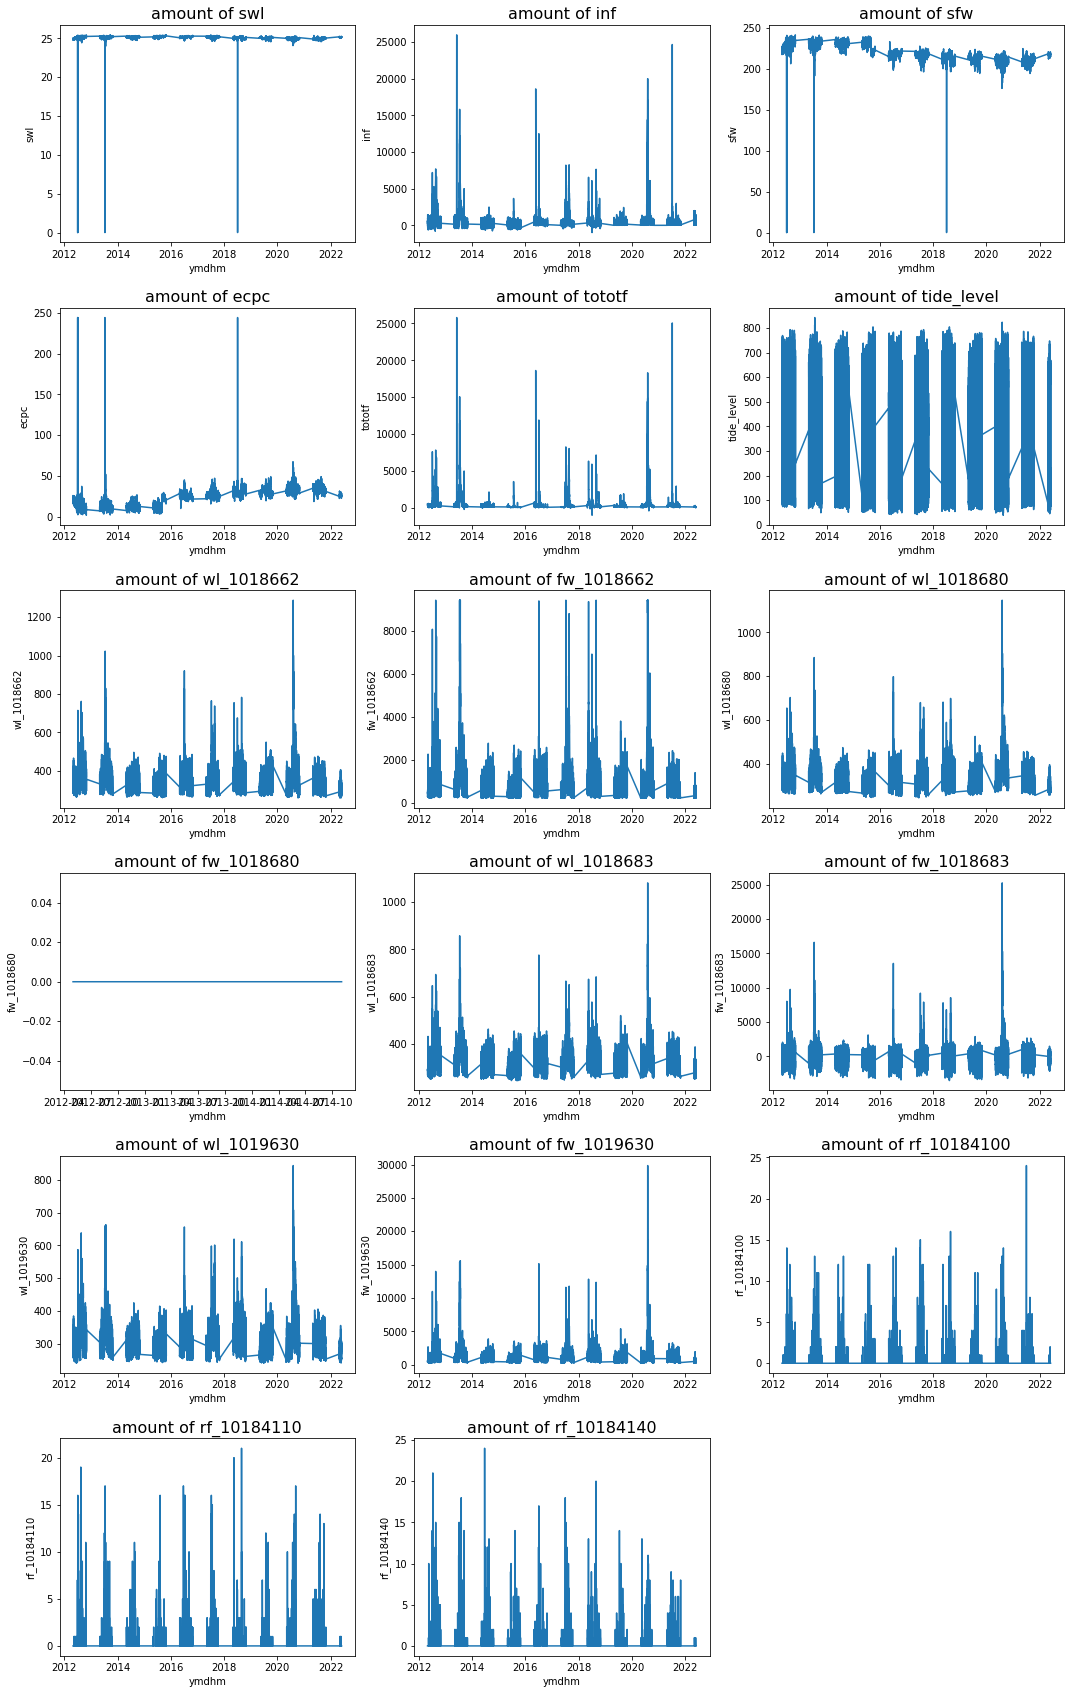

In [14]:
plt.figure(figsize=(18,30))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
for index,col in enumerate(train.columns[1:]):
    plt.subplot(6,3,index+1)
    sns.lineplot(data = train, x = train['ymdhm'], y = train[col])
    plt.title(f'amount of {col}',fontsize = 16)
plt.show()

<AxesSubplot:>

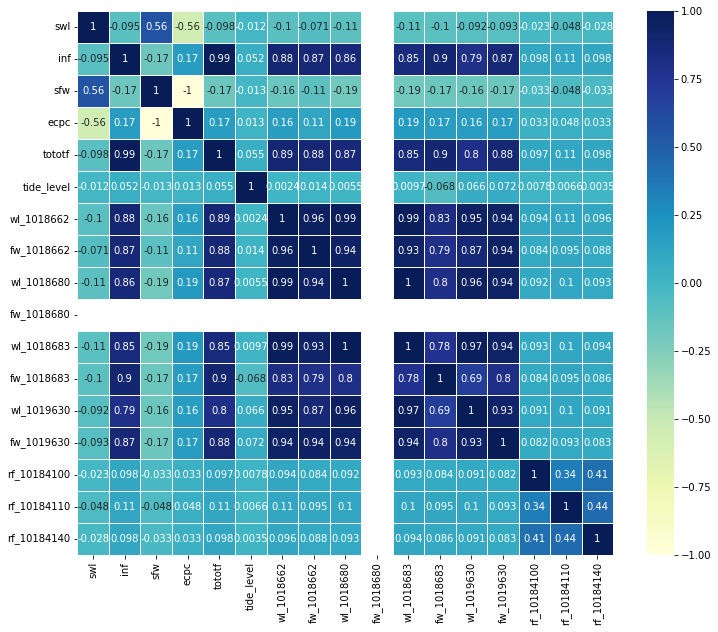

In [15]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

### 3. 전처리

#### 결측치 처리

fw_1018680 드롭하자 0 채워도 의미가 없다

drop 하기엔 feature가 너무 중요한데...

### fw_1018680 drop 보류

In [26]:
# 결측치가 있는 column
# df = df.drop(columns='fw_1018680')
# df

<AxesSubplot:ylabel='tide_level'>

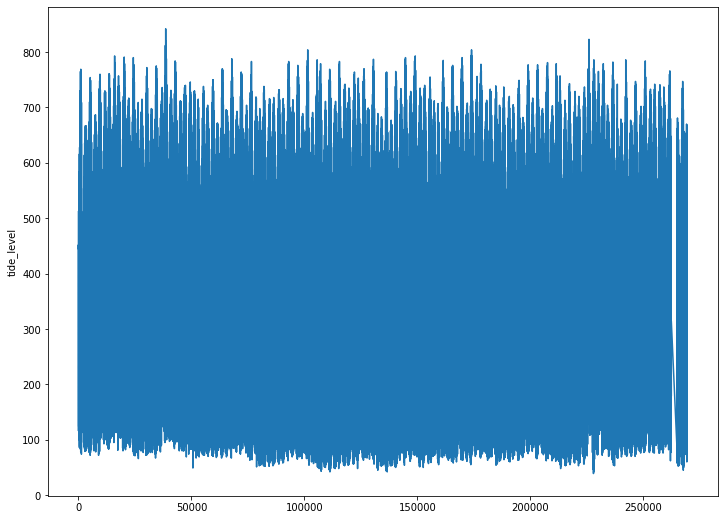

In [28]:
plt.figure(figsize = (12,9))
sns.lineplot(data = train.tide_level)

> NaN 값과 0 값.

<AxesSubplot:xlabel='ymdhm', ylabel='swl'>

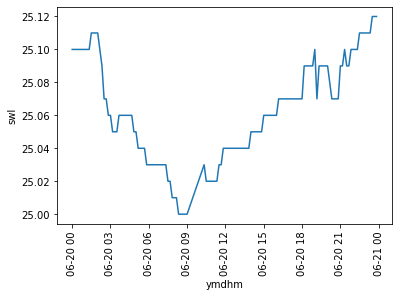

In [30]:
df_year = test[test['ymdhm'].dt.year == 2022]
df_month = df_year[df_year['ymdhm'].dt.month == 6]
df_day = df_month[df_month['ymdhm'].dt.day == 20]
plt.xticks(rotation = 90)
sns.lineplot(data = df_day, x = df_day.ymdhm, y = df_day.swl)

#### 결측치 채우기 딥러닝 모델 - datawig

In [ ]:
import datawig

아무래도 CUDA가 선행 설치되어야 하는데, 엔비디아에서 더이상 macOS에 대해 지원을 하지 않는다고 한다..
AMD니까.. 뭐..

## 1차 모델링
### 시계열
---
Prophet
> Prophet 학습을 위해 결측치 채워야함

### sklearn 으로 MICE 구현

In [52]:
# prophet_train = train.copy()
# prophet_train = prophet_train.drop(columns='ymdhm') # MICE에는 datetime 못들어감

In [53]:
prophet_2012 = train[train.ymdhm.dt.year == 2012]
prophet_2012 = prophet_2012.drop(columns='ymdhm')

In [54]:
prophet_2012

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,25.250,270.2,235.01,8.99,270.2,300.0,372.7,1018.67,364.2,0.0,365.0,1395.30,351.3,1837.11,0.0,0.0,0.0
26492,25.250,264.1,235.01,8.99,264.1,286.0,365.7,945.75,359.2,0.0,362.0,1154.21,350.3,1814.92,0.0,0.0,0.0
26493,25.250,257.9,235.01,8.99,257.9,273.0,362.7,915.35,356.2,0.0,359.0,968.58,349.3,1792.88,0.0,0.0,0.0
26494,25.250,264.1,235.01,8.99,264.1,261.0,355.7,846.39,352.2,0.0,356.0,776.99,346.3,1727.56,0.0,0.0,0.0


In [55]:
# MICE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# imputation_order parameter
# - `'ascending'`: From features with fewest missing values to most.
# - `'descending'`: From features with most missing values to fewest.
# - `'roman'`: Left to right.
# - `'arabic'`: Right to left.
# - `'random'`: A random order for each round.

# fit on the copied dataset
imp.fit(prophet_2012)
print('-------- complete fitting -------')
# transform the copied dataset
prophet_2012 = pd.DataFrame(imp.transform(prophet_2012), columns=prophet_2012.columns)

[IterativeImputer] Completing matrix with shape (26496, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.15
[IterativeImputer] Change: 246.50971031261645, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.27
[IterativeImputer] Change: 86.73134331669621, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.38
[IterativeImputer] Change: 65.20674218605492, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.53
[IterativeImputer] Change: 48.8582869499146, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.66
[IterativeImputer] Change: 36.60760815068437, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.78
[IterativeImputer] Change: 27.428645476375152, scaled tolerance: 1.3983590000000002e-06 
[Iterativ

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [56]:
prophet_2012.info() # 결측치 채워진거 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   swl          26496 non-null  float64
 1   inf          26496 non-null  float64
 2   sfw          26496 non-null  float64
 3   ecpc         26496 non-null  float64
 4   tototf       26496 non-null  float64
 5   tide_level   26496 non-null  float64
 6   wl_1018662   26496 non-null  float64
 7   fw_1018662   26496 non-null  float64
 8   wl_1018680   26496 non-null  float64
 9   fw_1018680   26496 non-null  float64
 10  wl_1018683   26496 non-null  float64
 11  fw_1018683   26496 non-null  float64
 12  wl_1019630   26496 non-null  float64
 13  fw_1019630   26496 non-null  float64
 14  rf_10184100  26496 non-null  float64
 15  rf_10184110  26496 non-null  float64
 16  rf_10184140  26496 non-null  float64
dtypes: float64(17)
memory usage: 3.4 MB


In [60]:
prophet_2012.wl_1018662

0        310.7
1        314.7
2        313.7
3        311.7
4        311.7
         ...  
26491    372.7
26492    365.7
26493    362.7
26494    355.7
26495    356.7
Name: wl_1018662, Length: 26496, dtype: float64

In [73]:
prophet_2012 = pd.concat([train[train.ymdhm.dt.year == 2012].ymdhm,prophet_2012.wl_1018662], axis =1)

In [76]:
# prophet을 위한 컬럼명 변경
prophet_2012.columns = ['ds', 'y']
prophet_2012

,ds,y
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
26491,2012-10-31 23:10:00,372.7
26492,2012-10-31 23:20:00,365.7
26493,2012-10-31 23:30:00,362.7
26494,2012-10-31 23:40:00,355.7


# reduce memory usage
---

In [161]:
def reduce_mem_usage(props, print_mode=False):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    if print_mode:
        print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in.
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            if print_mode:
                print("******************************")
                print("Column: ",col)
                print("dtype before: ",props[col].dtype)

            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
           # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
           
            # Print new column type
            if print_mode:
                print("dtype after: ",props[col].dtype)
                print("******************************")

    # Print final result
    if print_mode:
        print("___MEMORY USAGE AFTER COMPLETION:___")
        mem_usg = props.memory_usage().sum() / 1024**2
        print("Memory usage is: ",mem_usg," MB")
        print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [162]:
data_reducing = True

In [163]:
# Reducing DataFrame memory ~65%
if data_reducing:
    props, NAlist = reduce_mem_usage(prophet_train1, print_mode = True)
    print("_________________")
    print("")
    if NAlist:
        print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
        print("_________________")
        print("")
        print(NAlist)

Memory usage of properties dataframe is : 2.0556640625  MB
******************************
Column:  ds
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  y
dtype before:  float32
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2.0556640625  MB
This is  100.0 % of the initial size
_________________



/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_81019/586095519.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  props[col] = props[col].astype(np.float32)


---

In [77]:
from fbprophet import Prophet # prophet module

In [78]:
m = Prophet()
m.fit(prophet_2012)

future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       58209.1     0.0731206       10505.2           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       59033.3     0.0229824       3267.51           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       59350.5    0.00721326       929.059           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       59479.6     0.0057465       1214.34           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       60007.8    0.00864676       4644.38      0.7882      0.7882      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


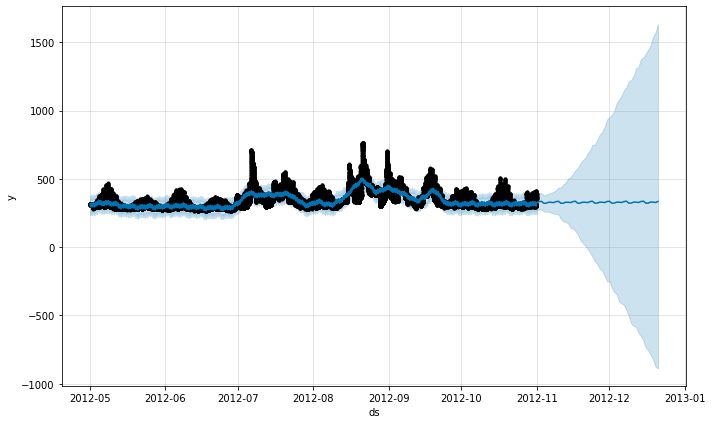

In [79]:
fig1 = m.plot(forecast)

In [89]:
imputed_train = train.copy()
imputed_train = imputed_train.drop(columns='ymdhm')

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# fit on the copied dataset
imp.fit(imputed_train)
print('-------- complete fitting -------')
# transform the copied dataset
imputed_train = pd.DataFrame(imp.transform(imputed_train), columns=imputed_train.columns)

[IterativeImputer] Completing matrix with shape (269424, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.36
[IterativeImputer] Change: 24518.796213747453, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.71
[IterativeImputer] Change: 993.8869516035043, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 4.02
[IterativeImputer] Change: 703.8973880451176, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 5.37
[IterativeImputer] Change: 540.7002459109048, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 6.73
[IterativeImputer] Change: 415.3085450087033, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 8.17
[IterativeImputer] Change: 318.9942064979726, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed time 9.59
[

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 3/30, elapsed time 0.18
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.25
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.30
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.36
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.42
[IterativeImputer] Ending imputation round 8/30, elapsed time 0.47
[IterativeImputer] Ending imputation round 9/30, elapsed time 0.53
[IterativeImputer] Ending imputation round 10/30, elapsed time 0.58
[IterativeImputer] Ending imputation round 11/30, elapsed time 0.64
[IterativeImputer] Ending imputation round 12/30, elapsed time 0.70
[IterativeImputer] Ending imputation round 13/30, elapsed time 0.75
[IterativeImputer] Ending imputation round 14/30, elapsed time 0.81
[IterativeImputer] Ending imputation round 15/30, elapsed time 0.87
[IterativeImputer] Ending imputation round 16/30, elapsed time 0.92
[IterativeImputer] Ending imputation round 17/30, elaps

In [95]:
imputed_train = pd.concat([train.ymdhm,imputed_train.wl_1018662], axis = 1)

In [100]:
imputed_train.columns = ['ds', 'y']

In [101]:
imputed_train

,ds,y
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
269419,2022-05-31 23:10:00,281.7
269420,2022-05-31 23:20:00,279.7
269421,2022-05-31 23:30:00,278.7
269422,2022-05-31 23:40:00,277.7


In [102]:
m = Prophet()
m.fit(imputed_train)

future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        656703    0.00642103       43356.3           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        658754    0.00330108       8536.83           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        659143     0.0031134       10592.1           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        660017   0.000535983       13839.9           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        660394   0.000521506       6746.27      0.6582      0.6582      571   
   

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


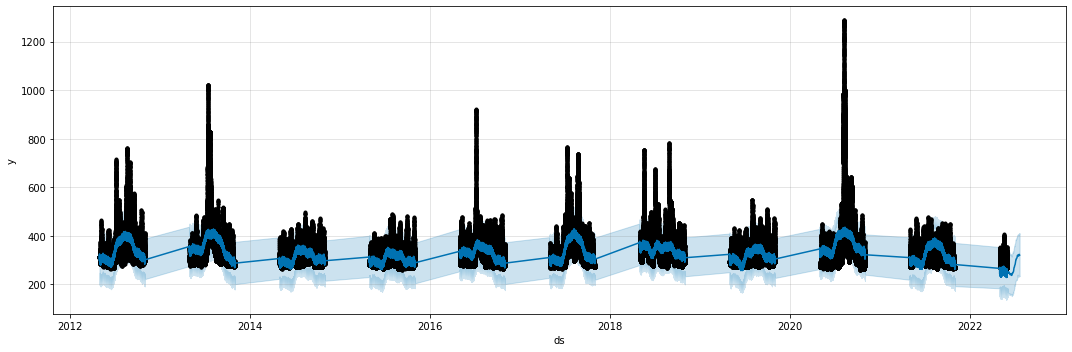

In [110]:
fig1 = m.plot(forecast, figsize = (15, 5))

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


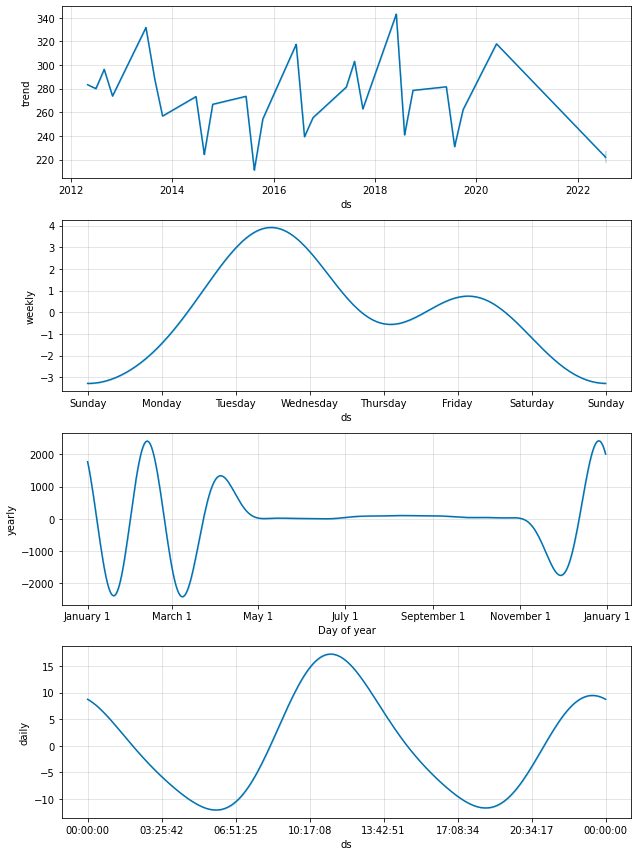

In [111]:
fig2 = m.plot_components(forecast)

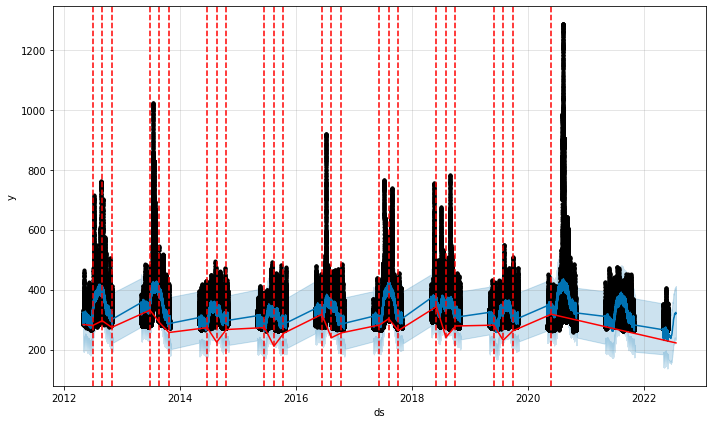

In [112]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        656727    0.00282116       30851.1           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        658934    0.00259648       10786.7      0.9513      0.9513      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        659926    0.00585536       28073.2      0.9145      0.9145      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        660825    0.00796389        104648      0.2715      0.2715      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        661676     0.0228218       19350.7           1           1      546   
   

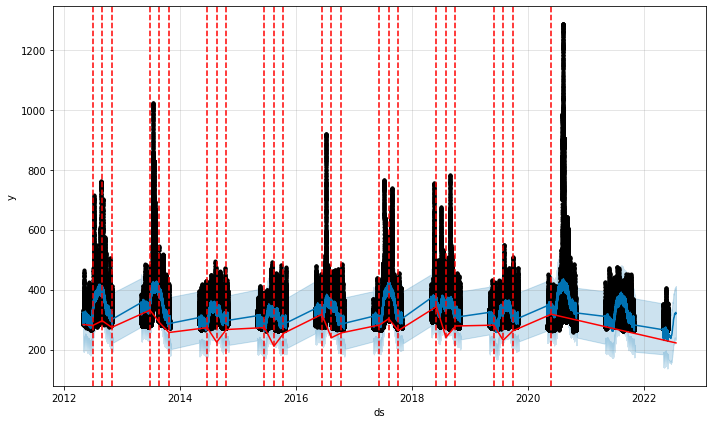

In [114]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(imputed_train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        657928    0.00403673       39497.7      0.4044           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        660020    0.00132956       20687.6           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        660613    0.00583727       12299.7           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        661284     0.0101954       38936.3           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        661751   0.000717998       5227.93           1           1      561   
   

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


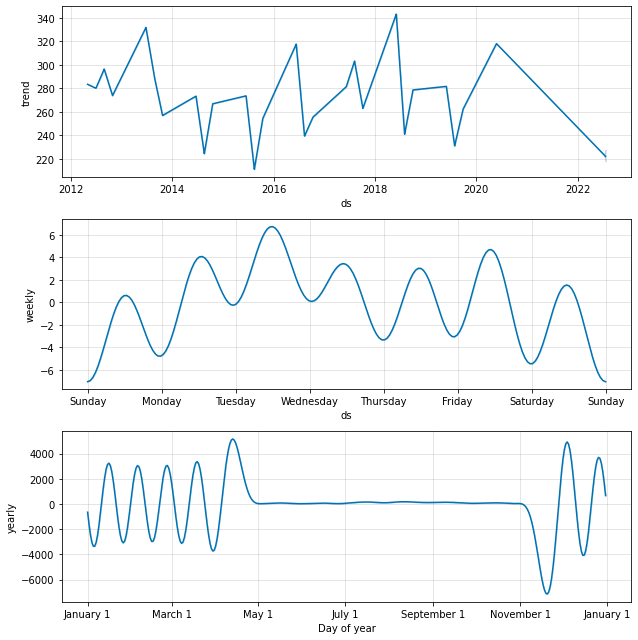

In [139]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(imputed_train)
fig = m.plot_components(forecast)

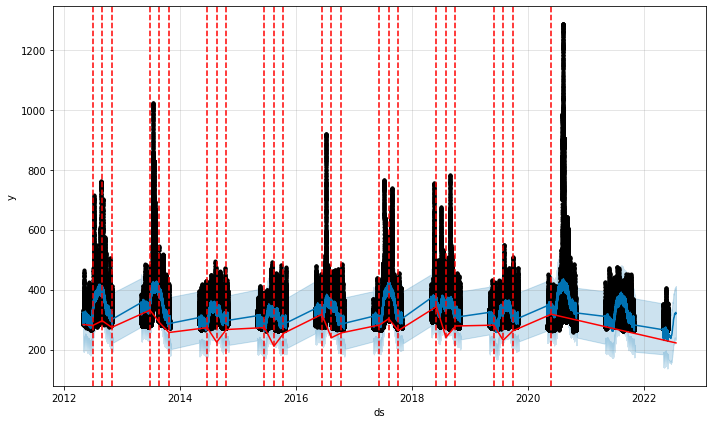

In [140]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

<AxesSubplot:xlabel='ds'>

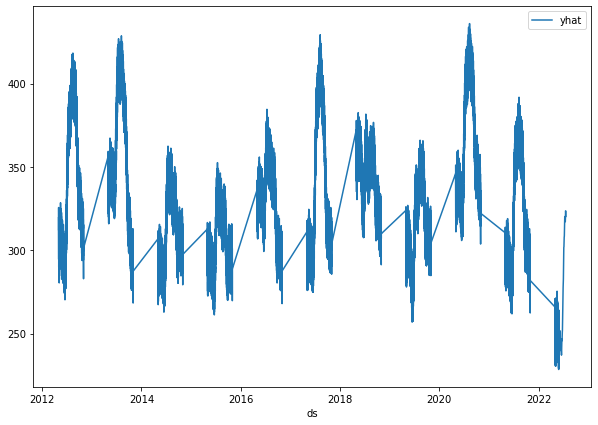

In [141]:
plt.figure(figsize=(10,7))
sns.lineplot(data = forecast[['ds', 'yhat']].set_index('ds'))

<AxesSubplot:xlabel='ymdhm'>

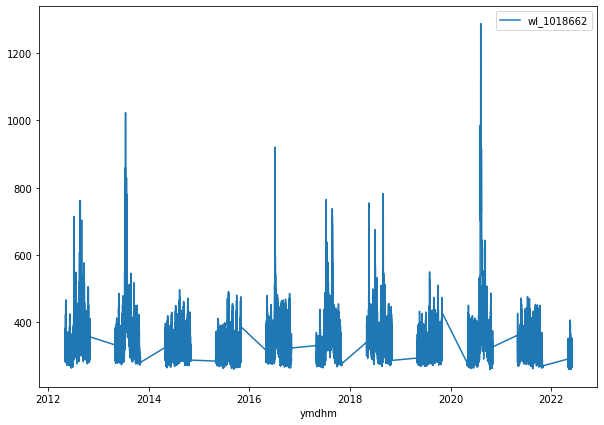

In [142]:
plt.figure(figsize=(10,7))
sns.lineplot(data = train[['ymdhm','wl_1018662']].set_index('ymdhm'))

<AxesSubplot:xlabel='ymdhm'>

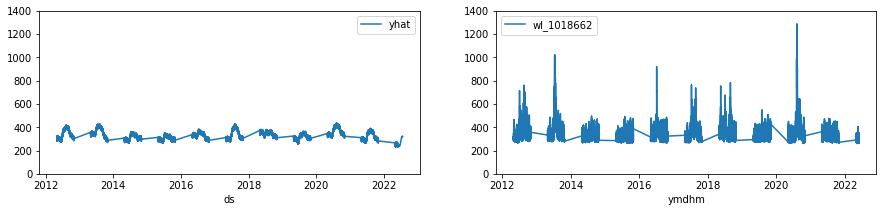

In [150]:
plt.figure(figsize=(15,3))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.subplot(1,2,1)
plt.ylim(0, 1400)
sns.lineplot(data = forecast[['ds', 'yhat']].set_index('ds'))
plt.subplot(1,2,2)
plt.ylim(0, 1400)
sns.lineplot(data = train[['ymdhm','wl_1018662']].set_index('ymdhm'))

##  IMPUTEED DATAFRAME

In [ ]:
imputed_df.fw_1018680.value_counts()

In [ ]:
df.fw_1018680.value_counts()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(imputed_df.corr(),
           cmap = 'YlGnBu',
           annot = True,
           linewidths=0.5)

## Before IMPUTE

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

In [ ]:
# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
correlated_features = 

In [ ]:
#### 다중공선성 처리
#### Encoding Categorical Features
# dtype이 object인 변수들 처리.



In [ ]:
#### feature extraction

- 차원의 저주를 해결하거나, 데이터의 feature 조합을 이용하는 새로운 feature를 생성할 때, PCA를 사용합니다.

- 분석에 사용할 feature를 선택하는 과정도 포함합니다.

In [ ]:
# PCA 적용
from sklearn.decomposition import PCA

if feature_reducing:
    pca = PCA(n_components=0.9) # PCA(n_components=6)
    pca_data = pca.fit_transform(X)

In [ ]:
### 4. 학습 데이터 분할

In [ ]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
# train : test = 8 : 2
from sklearn.model_selection import train_test_split

X = 
y =

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
### 5. 학습 및 평가

In [ ]:
# 간단하게 LightGBM 테스트
# 적당한 hyper-parameter 조합을 두었습니다. (항상 best는 아닙니다. 예시입니다.)

param_grid = {
    "max_bin" : 20,
    "learning_rate" : 0.0025,
    "objective" : "regression",
    "boosting_type" : "gbdt",
    "metric" : "mae",
    "sub_feature" : 0.345,
    "bagging_fraction" : 0.85,
    "bagging_freq" : 40,
    "num_leaves" : 512,
    "min_data" : 500,
    "min_hessian" : 0.05,
    "verbose" : 2,
    "feature_fraction_seed" : 2,
    "bagging_seed" : 3
}

model = LGBMRegressor(**param_grid)

In [ ]:
print("\nFitting LightGBM...")
model.fit(X_train, y_train)

In [ ]:
# metric은 그때마다 맞게 바꿔줘야 합니다.
evaluation_metric = 

In [ ]:
print("Prediction")
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)


train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_test, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

### 6. Hyper-parameter Tuning

> GridSearchCV

** LightGBM의 hyperparameter **

[Official Documentation] https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html 

[Blog 1] https://smecsm.tistory.com/133

[Blog 2] https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

[Blog 3] https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/

In [ ]:
# GridSearchCV를 이용하여 가장 좋은 성능을 가지는 모델을 찾아봅시다. (이것은 첫번째엔 선택입니다.)
# Lightgbm은 hyper-parameter의 영향을 많이 받기 때문에, 저는 보통 맨처음에 한번 정도는 가볍게 GCV를 해봅니다.
# 성능 향상이 별로 없다면, lightgbm으로 돌린 대략적인 성능이 이 정도라고 생각하면 됩니다.
# 만약 성능 향상이 크다면, 지금 데이터는 hyper-parameter tuning을 빡빡하게 하면 성능 향상이 많이 이끌어 낼 수 있습니다.

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [8, 16, None],
    "n_estimators" : [100, 300, 500],
    "max_bin" : [20],
    "learning_rate" : [0.001, 0.0025, 0.003],
    "objective" : ["regression"],
    "boosting_type" : ["gbdt"],
    "metric" : ["mae"],
    "sub_feature" : [0.345],
    "bagging_fraction" : [0.7, 0.75, 0.85],
    "bagging_freq" : [40],
    "num_leaves" : [256, 512],
    "min_data" : [500],
    "verbose" : [-1], # 필수
    "min_hessian" : [0.05],
    "feature_fraction_seed" : [2],
    "bagging_seed" : [3]
}


gcv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                  n_jobs=-1, verbose=1)

gcv.fit(X_train, y_train)
print("Best Estimator : ", gcv.best_estimator_)

In [ ]:
print("Prediction with Best Estimator")
gcv_pred_train = gcv.predict(X_train)
gcv_pred_test = gcv.predict(x_test)

gcv_train_score = evaluation_metric(y_train, gcv_pred_train)
gcv_test_score = evaluation_metric(y_test, gcv_pred_test)

print("Train MAE Score : %.4f" % gcv_train_score)
print("Test MAE Score : %.4f" % gcv_test_score)

In [ ]:
print("Performance Gain") # 이걸로 성능 향상 확인.
print("in train : ", (train_score - gcv_train_score))
print("in test : ", (test_score - gcv_test_score))

> optuna를 사용해봅시다 !

In [ ]:
def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    n_estimators = 
    max_depth = 
    max_features = 
    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features)
    
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    losses = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        loss = mean_absolute_error(y_val, preds)
        losses.append(loss)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(losses)

In [ ]:
K = # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K)

study = optuna.create_study(direction="minimize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study.optimize(opt_func, n_trials=5)

In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
study.trials_dataframe()

In [ ]:
print("Best Score: %.4f" % study.best_value) # best score 출력
print("Best params: ", study.best_trial.params) # best score일 때의 하이퍼파라미터들

In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(study)

### 7. 테스트 및 제출 파일 생성

In [ ]:
model = RandomForestRegressor(n_estimators=study.best_trial.params["n_estimators"],
                                 max_depth=study.best_trial.params["max_depth"],
                                 max_features=study.best_trial.params["max_features"])

model.fit(X_train, y_train)
preds = model.predict(X_test)
preds

In [ ]:
X_test # 원본 데이터랑 id가 맞는지 확인 해보기!

In [ ]:
submission = pd.DataFrame() # submission을 생성합니다.
submission

In [ ]:
submission.reset_index(drop=True).to_csv("submission.csv", index=False)